In [1]:
import os
import datetime
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

def get_current_time(format=None):
    """Gets the current time in Python and optionally formats it.

    Args:
        format (str, optional): The desired format for the time string.
            Defaults to None, which returns the time in ISO 8601 format (YYYY-MM-DD HH:MM:SS).
            Common format codes include:
                - %Y: Year (e.g., 2024)
                - %m: Month (e.g., 02)
                - %d: Day of the month (e.g., 27)
                - %H: Hour in 24-hour format (e.g., 16)
                - %M: Minute (e.g., 58)
                - %S: Second (e.g., 24)
                - %f: Microseconds (e.g., 406569)

    Returns:
        str: The formatted current time string.
    """

    current_time = datetime.datetime.now()

    if format:
        return current_time.strftime(format)
    else:
        return current_time.isoformat()

current_time = get_current_time("%d-%m-%y_%H=%M=%S")
    
def remove_file(filename):
    if os.path.exists(filename):
        os.remove(filename)


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Macam macam algoritma
algorithm_pack = [[GaussianNB(), 'Naive Bayes', 'NB'],
                [KNeighborsClassifier(), 'K Nearest Neighbors', 'KNN'],
                [SVC(), 'Support Vector Machine', 'SVM'],
                [LogisticRegression(random_state=100), 'Logistic Regression', 'LR'],
                [GradientBoostingClassifier(random_state=100, learning_rate=0.125), 'Gradient Boosting', 'GB'],
                [DecisionTreeClassifier(random_state=100), 'Decision Tree', 'DT'],
                [RandomForestClassifier(random_state=100), 'Random Forest','RF'],
                [MLPClassifier(max_iter=1000), 'Multi-layer Perceptron', 'MLP']]

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
origin_test_data = test_data

In [4]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
# Change based on what the problem is
dropped_columns = ['id', 'CustomerId', 'Surname']
target_column = 'Exited'

categorical_features = train_data.drop(columns=dropped_columns + [target_column]).select_dtypes(include=['object']).columns.tolist()
numerical_features = train_data.drop(columns=dropped_columns + [target_column]).select_dtypes(exclude=['object']).columns.tolist()

train_data = train_data.drop(columns=dropped_columns)
test_data = test_data.drop(columns=dropped_columns)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [9]:
train_data=pd.get_dummies(data=train_data,drop_first=True)
test_data=pd.get_dummies(data=test_data,drop_first=True)

In [10]:
train_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,False,True,False
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,False,False,True
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,False,False,True
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,False,True,False


In [11]:
test_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,False,False,False
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,False,False,False
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,False,False,False
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,False,False,True
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,False,True,True
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,False,False,False
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,False,False,True
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,False,False,False


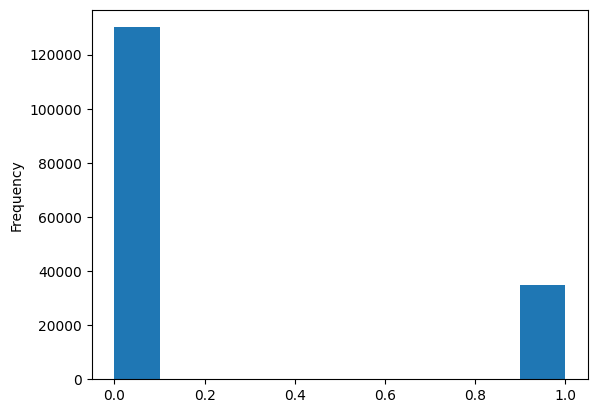

In [12]:
train_data.Exited.plot.hist()
plt.show()

In [13]:
train_data_wo_target = train_data.drop(columns=[target_column])

<Axes: title={'center': 'Correlated with Exited Column'}>

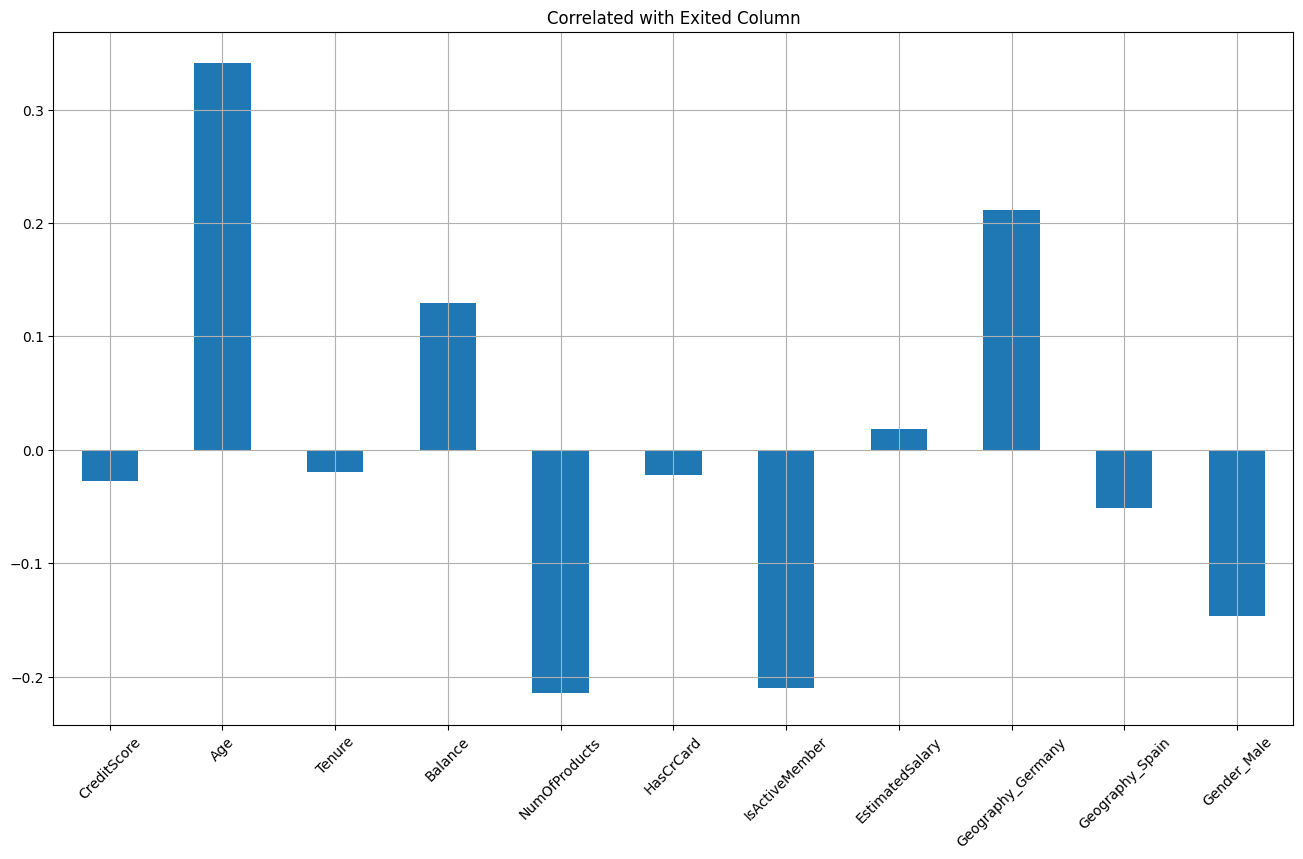

In [14]:
train_data_wo_target.corrwith(train_data[target_column]).plot.bar(figsize=(16,9), title=f'Correlated with {target_column} Column', rot=45,grid=True)

<Axes: >

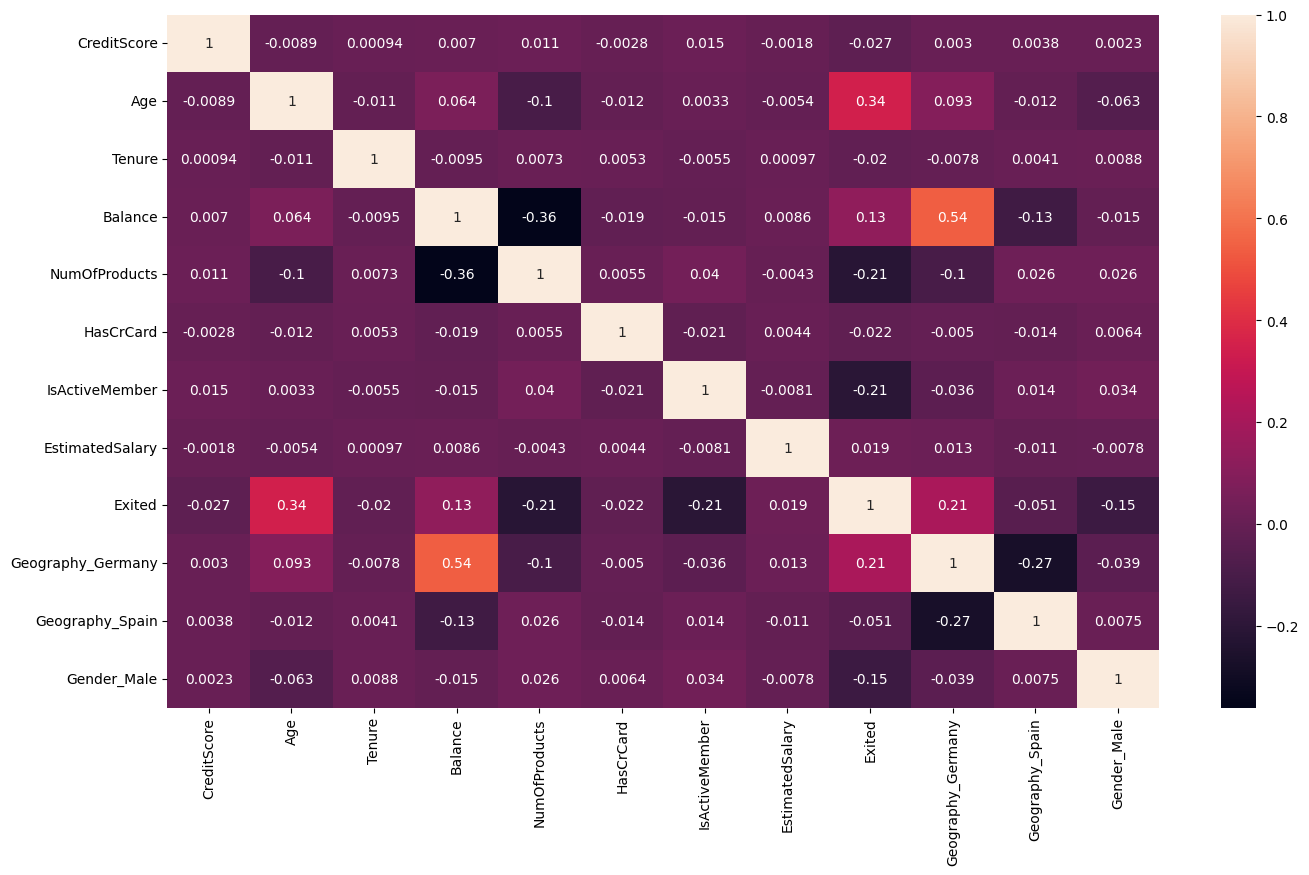

In [15]:
corr = train_data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [25]:
x_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]
x_test = test_data

In [17]:
algorithm_pack_2 = [[GaussianNB(), 'Naive Bayes', 'NB'],
                [KNeighborsClassifier(), 'K Nearest Neighbors', 'KNN'],
                # [SVC(), 'Support Vector Machine', 'SVM'], 
                [GradientBoostingClassifier(random_state=100, learning_rate=0.15), 'Gradient Boosting', 'GB'],
                [DecisionTreeClassifier(random_state=100), 'Decision Tree', 'DT']]

results=[]
for i in range (len(algorithm_pack_2)):
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(algorithm_pack_2[i][0], x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    print('%s: %f (%f)' % (algorithm_pack_2[i][2], cv_results.mean(), cv_results.std()))

NB: 0.792588 (0.002035)
KNN: 0.755699 (0.002027)
GB: 0.865119 (0.002761)
DT: 0.797411 (0.001576)


In [18]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,False,True,False
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,False,False,True
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,False,False,True
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,False,True,False


In [19]:
test_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,False,False,False
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,False,False,False
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,False,False,False
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,False,False,True
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,False,True,True
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,False,False,False
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,False,False,True
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,False,False,False


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [21]:
train_df = pd.DataFrame(x_train)
train_df.columns = train_data.drop(columns=[target_column]).columns
train_df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,-0.515098,-0.530199,0.878465
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,-0.515098,-0.530199,0.878465
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,-0.515098,-0.530199,0.878465
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,-0.515098,-0.530199,0.878465
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,-0.515098,1.886084,0.878465


In [22]:
smote = SMOTE(
    sampling_strategy='auto',
    random_state=0
    )
x_train, y_train = smote.fit_resample(x_train, y_train)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=1, shuffle=True)

In [ ]:
predictions = algorithm_pack[0][0].predict(x_test) #NB
predictions = algorithm_pack[1][0].predict(x_test) #KNN
predictions = algorithm_pack[4][0].predict(x_test) #GB
predictions = algorithm_pack[5][0].predict(x_test) #DT

In [32]:
algorithm_pack[5][0].fit(X_train, y_train)
predictions = algorithm_pack[5][0].predict(x_test) #NB

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

algorithm_pack_2 = [[GaussianNB(), 'Naive Bayes', 'NB'],
                [KNeighborsClassifier(), 'K Nearest Neighbors', 'KNN'],
                # [SVC(), 'Support Vector Machine', 'SVM'], 
                [GradientBoostingClassifier(random_state=100, learning_rate=0.15), 'Gradient Boosting', 'GB'],
                [DecisionTreeClassifier(random_state=100), 'Decision Tree', 'DT']]



results = []

for i in range(len(algorithm_pack_2)):
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(algorithm_pack_2[i][0], X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    print('%s: %f (%f)' % (algorithm_pack_2[i][2], cv_results.mean(), cv_results.std()))

best_model_index = np.argmax(np.mean(results, axis=1))
best_model_name = algorithm_pack_2[best_model_index][2]
best_model = algorithm_pack_2[best_model_index][0]
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_validation)
print(f"\nClassification report for the best model which is {best_model_name}:")
print(classification_report(y_validation, predictions))

NB: 0.738433 (0.002863)


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=100).fit(x_train, y_train)
y_predictions = model.predict_proba(x_test)
predictions_probabilities = y_predictions[:, 1]
rounded_probabilities = [round(prob, 1) for prob in predictions_probabilities]
ids = origin_test_data['id']
output_df = pd.DataFrame({'id': ids, 'Exited': rounded_probabilities})
output_csv_name = f"predictions_RF_{current_time}.csv"
output_df.to_csv(output_csv_name, index=False)

# Algoritma untuk output data yang dipakai untuk melatih model
clean_data_df = pd.DataFrame(x_train)
clean_data_df.columns = train_data.drop(columns=[target_column]).columns
clean_data_csv_name = f"clean_data_RF_{current_time}.csv"
clean_data_df.to_csv(clean_data_csv_name, index=False)

# Algoritma untuk output dokumentasi seperti permasalahan yang diselesaikan, waktu run code, dll.
documentation_txt_name = f"documentation_RF_{current_time}.txt"
current_ipynb_file = "BCDv2.ipynb"
string_to_write = ""
with open(documentation_txt_name, "w") as f:
    # Write your documentation content to the file
    string_to_write += f"Problem to solve\t\t: {os.path.basename(os.getcwd())}\n"
    string_to_write += f"Date and Time file created\t: {get_current_time()}\n"
    string_to_write += f"Algorithm title\t\t\t: Random Forest\n\n"
    string_to_write += f"Training data info:\n{train_data.dtypes}\n\n"
    string_to_write += f"Test data info:\n{test_data.dtypes}\n\n"
    string_to_write += f"Categorical Features\t: {categorical_features}\n"
    string_to_write += f"Numerical Features\t: {numerical_features}\n\n"
    string_to_write += f"For more data details see {clean_data_csv_name} (data that are beeing trained)\n"
    string_to_write += f"For data preprocessing details see {current_ipynb_file} or self\n"
    f.write(string_to_write)

with zipfile.ZipFile(f"complete_data_RF_{current_time}.zip", "w") as zip_file:
    # Add the current code into the zip
    zip_file.write(current_ipynb_file, arcname=current_ipynb_file)
    # Add the CSV file
    zip_file.write(output_csv_name, arcname=output_csv_name)  # Specify archive name for the CSV
    zip_file.write(clean_data_csv_name, arcname=clean_data_csv_name)  # Specify archive name for the CSV
    # Add the text file
    zip_file.write(documentation_txt_name, arcname=documentation_txt_name)  # Specify archive name for the text file
    remove_file(clean_data_csv_name)
    remove_file(documentation_txt_name)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=100, learning_rate=0.15).fit(x_train, y_train)
y_predictions = model.predict_proba(x_test)
predictions_probabilities = y_predictions[:, 1]
rounded_probabilities = [round(prob, 1) for prob in predictions_probabilities]
ids = origin_test_data['id']
output_df = pd.DataFrame({'id': ids, 'Exited': rounded_probabilities})
output_csv_name = f"predictions_GB_{current_time}.csv"
output_df.to_csv(output_csv_name, index=False)

# Algoritma untuk output data yang dipakai untuk melatih model
clean_data_df = pd.DataFrame(x_train)
clean_data_df.columns = train_data.drop(columns=[target_column]).columns
clean_data_csv_name = f"clean_data_GB_{current_time}.csv"
clean_data_df.to_csv(clean_data_csv_name, index=False)

# Algoritma untuk output dokumentasi seperti permasalahan yang diselesaikan, waktu run code, dll.
documentation_txt_name = f"documentation_GB_{current_time}.txt"
current_ipynb_file = "BCDv2.ipynb"
string_to_write = ""
with open(documentation_txt_name, "w") as f:
    # Write your documentation content to the file
    string_to_write += f"Problem to solve\t\t: {os.path.basename(os.getcwd())}\n"
    string_to_write += f"Date and Time file created\t: {get_current_time()}\n"
    string_to_write += f"Algorithm title\t\t\t: Gradient Boosting\n\n"
    string_to_write += f"Training data info:\n{train_data.dtypes}\n\n"
    string_to_write += f"Test data info:\n{test_data.dtypes}\n\n"
    string_to_write += f"Categorical Features\t: {categorical_features}\n"
    string_to_write += f"Numerical Features\t: {numerical_features}\n\n"
    string_to_write += f"For more data details see {clean_data_csv_name} (data that are beeing trained)\n"
    string_to_write += f"For data preprocessing details see {current_ipynb_file} or self\n"
    f.write(string_to_write)

with zipfile.ZipFile(f"complete_data_GB_{current_time}.zip", "w") as zip_file:
    # Add the current code into the zip
    zip_file.write(current_ipynb_file, arcname=current_ipynb_file)
    # Add the CSV file
    zip_file.write(output_csv_name, arcname=output_csv_name)  # Specify archive name for the CSV
    zip_file.write(clean_data_csv_name, arcname=clean_data_csv_name)  # Specify archive name for the CSV
    # Add the text file
    zip_file.write(documentation_txt_name, arcname=documentation_txt_name)  # Specify archive name for the text file
    remove_file(clean_data_csv_name)
    remove_file(documentation_txt_name)

In [ ]:
from xgboost import XGBClassifier
model_params = {
    "objective": "binary:logistic", 
    "n_estimators": 100,  
    "learning_rate": 0.15,  
    "max_depth": 5
}

model = XGBClassifier(**model_params)
model.fit(x_train, y_train)
y_probability = model.predict_proba(x_test)[:, 1]
rounded_probabilities = [round(prob, 1) for prob in y_probability]
ids = origin_test_data['id']
output_df = pd.DataFrame({'id': ids, 'Exited': rounded_probabilities})
output_csv_name = f"predictions_XGB_{current_time}.csv"
output_df.to_csv(output_csv_name, index=False)

clean_data_df = pd.DataFrame(x_train)
clean_data_df.columns = train_data.drop(columns=[target_column]).columns
clean_data_csv_name = f"clean_data_XGB_{current_time}.csv"
clean_data_df.to_csv(clean_data_csv_name, index=False)

# Algoritma untuk output dokumentasi seperti permasalahan yang diselesaikan, waktu run code, dll.
documentation_txt_name = f"documentation_XGB_{current_time}.txt"
current_ipynb_file = "BCDv2.ipynb"
string_to_write = ""
with open(documentation_txt_name, "w") as f:
    # Write your documentation content to the file
    string_to_write += f"Problem to solve\t\t: {os.path.basename(os.getcwd())}\n"
    string_to_write += f"Date and Time file created\t: {get_current_time()}\n"
    string_to_write += f"Algorithm title\t\t\t: XG Boost\n\n"
    string_to_write += f"Training data info:\n{train_data.dtypes}\n\n"
    string_to_write += f"Test data info:\n{test_data.dtypes}\n\n"
    string_to_write += f"Categorical Features\t: {categorical_features}\n"
    string_to_write += f"Numerical Features\t: {numerical_features}\n\n"
    string_to_write += f"For more data details see {clean_data_csv_name} (data that are beeing trained)\n"
    string_to_write += f"For data preprocessing details see {current_ipynb_file} or self\n"
    f.write(string_to_write)

with zipfile.ZipFile(f"complete_data_XGB_{current_time}.zip", "w") as zip_file:
    # Add the current code into the zip
    zip_file.write(current_ipynb_file, arcname=current_ipynb_file)
    # Add the CSV file
    zip_file.write(output_csv_name, arcname=output_csv_name)  # Specify archive name for the CSV
    zip_file.write(clean_data_csv_name, arcname=clean_data_csv_name)  # Specify archive name for the CSV
    # Add the text file
    zip_file.write(documentation_txt_name, arcname=documentation_txt_name)  # Specify archive name for the text file
    remove_file(clean_data_csv_name)
    remove_file(documentation_txt_name)


ModuleNotFoundError: No module named 'xgboost'